In [4]:
# importing major libraries
import pandas as pd  #for dataframe
import numpy as np
import matplotlib.pyplot as plt #for visualizations
import seaborn as sns #for visualizations
from datetime import datetime
from sklearn.preprocessing import LabelEncoder   
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #for machine learning 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor  #for machine learning
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
#Step 2: Import and Inspect the Data 
# loading dataset -- excel sheet
df = pd.read_csv("C:\\Users\\Hp\\Desktop\\MELBOURNE_HOUSE_PRICES_LESS.csv")

In [7]:
#• Inspect the dataset structure using .shape, .info(), .head(), and .describe() 
# inspecting dataset ---using .shape, .info(), .head(), and .describe()
print("Shape:", df.shape)

Shape: (63023, 13)


In [8]:
# getting information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB
None


In [9]:
# See how the columns are named we use df.head()
print(df.head())

         Suburb           Address  Rooms Type      Price Method   SellerG  \
0    Abbotsford     49 Lithgow St      3    h  1490000.0      S    Jellis   
1    Abbotsford     59A Turner St      3    h  1220000.0      S  Marshall   
2    Abbotsford     119B Yarra St      3    h  1420000.0      S    Nelson   
3    Aberfeldie        68 Vida St      3    h  1515000.0      S     Barry   
4  Airport West  92 Clydesdale Rd      2    h   670000.0      S    Nelson   

        Date  Postcode             Regionname  Propertycount  Distance  \
0  1/04/2017      3067  Northern Metropolitan           4019       3.0   
1  1/04/2017      3067  Northern Metropolitan           4019       3.0   
2  1/04/2017      3067  Northern Metropolitan           4019       3.0   
3  1/04/2017      3040   Western Metropolitan           1543       7.5   
4  1/04/2017      3042   Western Metropolitan           3464      10.4   

                  CouncilArea  
0          Yarra City Council  
1          Yarra City Counci

In [10]:
# getting major statistics about dataset
print(df.describe())

              Rooms         Price      Postcode  Propertycount      Distance
count  63023.000000  4.843300e+04  63023.000000   63023.000000  63023.000000
mean       3.110595  9.978982e+05   3125.673897    7617.728131     12.684829
std        0.957551  5.934989e+05    125.626877    4424.423167      7.592015
min        1.000000  8.500000e+04   3000.000000      39.000000      0.000000
25%        3.000000  6.200000e+05   3056.000000    4380.000000      7.000000
50%        3.000000  8.300000e+05   3107.000000    6795.000000     11.400000
75%        4.000000  1.220000e+06   3163.000000   10412.000000     16.700000
max       31.000000  1.120000e+07   3980.000000   21650.000000     64.100000


In [11]:
# Step 3: Clean and Preprocess the Data
#• Handle missing or duplicate data and Drop or rename irrelevant columns. • 
# See how many missing values per column first to know if we are cleaning dataset or not
print(df.isnull().sum())
# no missing values in the dataset

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64


In [12]:
# Drop rows or columns with too many missing values
df = df.dropna()  # Drops any row with missing data (use cautiously)

In [13]:
# initally price column had missing columns but after i dropped it no more missing columns
# See how many missing values per column
print(df.isnull().sum())
# no missing values in the dataset

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64


In [14]:
# filling missing values with median and mode if any 
df['Price'] = df['Price'].fillna(df['Price'].median())
df['Suburb'] = df['Suburb'].fillna(df['Suburb'].mode()[0])

In [15]:
# step 3 --: Clean and Preprocess the Data
# ensuing all columns are intact 
# Encode categorical variables
# verifying columns
print(df.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')


In [16]:
# Step 1: One-Hot Encoding for low-cardinality columns: Type, Method, Regionname
one_hot_columns = ['Type', 'Method', 'Regionname']
df_encoded = pd.get_dummies(df, columns=one_hot_columns, prefix=one_hot_columns, drop_first=True)

In [17]:
# Step 2: Label Encoding for high-cardinality columns: Suburb, SellerG, CouncilArea
label_columns = ['Suburb', 'SellerG', 'CouncilArea']
label_encoders = {}  # Store encoders for potential inverse transformation
for col in label_columns:
    le = LabelEncoder()
    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save encoder for potential decoding
    df_encoded = df_encoded.drop(col, axis=1)  # Drop original column

# Verify the columns after encoding
print("\nColumns after encoding:")
print(df_encoded.columns)


Columns after encoding:
Index(['Address', 'Rooms', 'Price', 'Date', 'Postcode', 'Propertycount',
       'Distance', 'Type_t', 'Type_u', 'Method_S', 'Method_SA', 'Method_SP',
       'Method_VB', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'Suburb_encoded', 'SellerG_encoded',
       'CouncilArea_encoded'],
      dtype='object')


In [18]:
# Display the first few rows of the encoded dataset
print("\nFirst few rows of the encoded dataset:")
print(df_encoded.head())


First few rows of the encoded dataset:
            Address  Rooms      Price       Date  Postcode  Propertycount  \
0     49 Lithgow St      3  1490000.0  1/04/2017      3067           4019   
1     59A Turner St      3  1220000.0  1/04/2017      3067           4019   
2     119B Yarra St      3  1420000.0  1/04/2017      3067           4019   
3        68 Vida St      3  1515000.0  1/04/2017      3040           1543   
4  92 Clydesdale Rd      2   670000.0  1/04/2017      3042           3464   

   Distance  Type_t  Type_u  Method_S  ...  Regionname_Eastern Victoria  \
0       3.0   False   False      True  ...                        False   
1       3.0   False   False      True  ...                        False   
2       3.0   False   False      True  ...                        False   
3       7.5   False   False      True  ...                        False   
4      10.4   False   False      True  ...                        False   

   Regionname_Northern Metropolitan  Regionnam

In [19]:
# Normalize/scale numeric features if necessary.
# Step 1: Identify numeric columns to scale
numeric_columns = ['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance']


In [20]:
# Step 2: Handle missing values in numeric columns (e.g., Price has missing values)
df_encoded['Price'] = df_encoded['Price'].fillna(df_encoded['Price'].mean())

In [21]:
# Step 3: Apply StandardScaler
scaler = StandardScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])


In [22]:
# Step 4: Verify the scaled features
print("Summary statistics after scaling:")
print(df_encoded[numeric_columns].describe())

Summary statistics after scaling:
              Rooms         Price      Postcode  Propertycount      Distance
count  4.843300e+04  4.843300e+04  4.843300e+04   4.843300e+04  4.843300e+04
mean  -1.191255e-16  1.613770e-17  4.163525e-16  -5.046698e-17  2.505744e-16
std    1.000010e+00  1.000010e+00  1.000010e+00   1.000010e+00  1.000010e+00
min   -2.192940e+00 -1.538179e+00 -9.814925e-01  -1.688758e+00 -1.682496e+00
25%   -1.134401e+00 -6.367360e-01 -5.752269e-01  -7.372974e-01 -7.553373e-01
50%   -7.586129e-02 -2.828985e-01 -1.609953e-01  -2.242134e-01 -1.328168e-01
75%    9.826780e-01  3.742282e-01  3.169642e-01   6.384048e-01  5.294391e-01
max    2.956324e+01  1.718993e+01  6.825180e+00   3.159628e+00  5.708280e+00


In [23]:
#Step 3: Clean and Preprocess the Data 
# Convert date/time values where appropriate
df_original = df.copy()

# Step 1: Convert the Date column to datetime in df_original
try:
    df_original['Date'] = pd.to_datetime(df_original['Date'], format='%d/%m/%Y')
except ValueError as e:
    print("Error converting Date column:", e)
    print("Sample of Date column:", df_original['Date'].head())

# Step 2: Extract useful features from the Date column
df_original['Year'] = df_original['Date'].dt.year
df_original['Month'] = df_original['Date'].dt.month
df_original['Day'] = df_original['Date'].dt.day
df_original['DayOfWeek'] = df_original['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Step 3: Verify the conversion and extracted features
print("First few rows with converted Date and extracted features in df_original:")
print(df_original[['Date', 'Year', 'Month', 'Day', 'DayOfWeek']].head())

# Step 4: Add the new features to df_encoded
# Map the new features from df_original to df_encoded using the index
df_encoded['Year'] = df_original['Year']
df_encoded['Month'] = df_original['Month']
df_encoded['Day'] = df_original['Day']
df_encoded['DayOfWeek'] = df_original['DayOfWeek']

# Step 5: Drop the Date column from df_encoded if it exists (since it's not numeric)
df_encoded = df_encoded.drop('Date', axis=1, errors='ignore')

# Step 6: Scale the new numeric features to match the existing scaled features
new_numeric_columns = ['Year', 'Month', 'Day', 'DayOfWeek']
scaler = StandardScaler()
df_encoded[new_numeric_columns] = scaler.fit_transform(df_encoded[new_numeric_columns])

# Step 7: Verify the updated df_encoded
print("\nColumns in the updated df_encoded:")
print(df_encoded.columns)

# Step 8: Display the first few rows of the new features
print("\nFirst few rows of the new features in df_encoded:")
print(df_encoded[new_numeric_columns].head())

First few rows with converted Date and extracted features in df_original:
        Date  Year  Month  Day  DayOfWeek
0 2017-04-01  2017      4    1          5
1 2017-04-01  2017      4    1          5
2 2017-04-01  2017      4    1          5
3 2017-04-01  2017      4    1          5
4 2017-04-01  2017      4    1          5

Columns in the updated df_encoded:
Index(['Address', 'Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance',
       'Type_t', 'Type_u', 'Method_S', 'Method_SA', 'Method_SP', 'Method_VB',
       'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'Suburb_encoded', 'SellerG_encoded',
       'CouncilArea_encoded', 'Year', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

First few rows of the new features in df_encoded:
       Year   Month       Day  DayO

In [25]:
#Step 4: Conduct Basic EDA 
# Summary statistics for numeric columns
numeric_columns = ['Price', 'Rooms', 'Distance', 'Postcode', 'Propertycount']
print("Summary statistics for numeric columns:")
print(df_original[numeric_columns].describe())

Summary statistics for numeric columns:
              Price         Rooms      Distance      Postcode  Propertycount
count  4.843300e+04  48433.000000  48433.000000  48433.000000   48433.000000
mean   9.978982e+05      3.071666     12.702761   3123.210332    7566.399913
std    5.934989e+05      0.944708      7.550030    125.534940    4457.405884
min    8.500000e+04      1.000000      0.000000   3000.000000      39.000000
25%    6.200000e+05      2.000000      7.000000   3051.000000    4280.000000
50%    8.300000e+05      3.000000     11.700000   3103.000000    6567.000000
75%    1.220000e+06      4.000000     16.700000   3163.000000   10412.000000
max    1.120000e+07     31.000000     55.800000   3980.000000   21650.000000


In [26]:
# Summary statistics for categorical columns
categorical_columns = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Regionname', 'CouncilArea']
print("\nSummary statistics for categorical columns:")
print(df_original[categorical_columns].describe(include='object'))



Summary statistics for categorical columns:
           Suburb          Address   Type Method SellerG  \
count       48433            48433  48433  48433   48433   
unique        370            44739      3      5     422   
top     Reservoir  14 Northcote St      h      S   Barry   
freq         1067                7  34161  30624    4818   

                   Regionname           CouncilArea  
count                   48433                 48433  
unique                      8                    34  
top     Northern Metropolitan  Darebin City Council  
freq                    13598                  3462  


In [27]:
# Top 10 most frequent values for each categorical column 
for col in categorical_columns:
    print(f"\nTop 10 most frequent values for {col}:")
    print(df_original[col].value_counts().head(10))


Top 10 most frequent values for Suburb:
Suburb
Reservoir         1067
Bentleigh East     696
Richmond           642
Craigieburn        598
Preston            593
Mount Waverley     556
Brunswick          540
Northcote          496
Cheltenham         493
Glen Waverley      486
Name: count, dtype: int64

Top 10 most frequent values for Address:
Address
14 Northcote St              7
14 Moray St                  7
56 Victoria St               7
8 Brogil Wk                  6
2 Grout St                   6
55 Coronation St             6
5/169 Centre Dandenong Rd    6
2A Charles St                6
39 York St                   6
8/12 Schofield St            6
Name: count, dtype: int64

Top 10 most frequent values for Type:
Type
h    34161
u     9292
t     4980
Name: count, dtype: int64

Top 10 most frequent values for Method:
Method
S     30624
SP     6480
PI     5940
VB     5024
SA      365
Name: count, dtype: int64

Top 10 most frequent values for SellerG:
SellerG
Barry            4818
J

In [28]:
#Grouping Techniques to Identify Trends
# Average price by Suburb (top 10)
avg_price_by_suburb = df_original.groupby('Suburb')['Price'].mean().sort_values(ascending=False).head(10)
print("Top 10 suburbs by average price:")
print(avg_price_by_suburb)

Top 10 suburbs by average price:
Suburb
Deepdene        2.359806e+06
Canterbury      2.228267e+06
Middle Park     2.211656e+06
Malvern         2.055545e+06
Brighton        2.028911e+06
Albert Park     1.959777e+06
Balwyn          1.891814e+06
Ivanhoe East    1.835818e+06
Camberwell      1.810615e+06
Kooyong         1.807769e+06
Name: Price, dtype: float64


In [29]:
# Average price by Type
avg_price_by_type = df_original.groupby('Type')['Price'].mean()
print("Average price by Type:")
print(avg_price_by_type)

Average price by Type:
Type
h    1.110587e+06
t    9.111480e+05
u    6.301053e+05
Name: Price, dtype: float64


In [30]:
# Average price by Regionname
avg_price_by_region = df_original.groupby('Regionname')['Price'].mean().sort_values(ascending=False)
print("Average price by Regionname:")
print(avg_price_by_region)

Average price by Regionname:
Regionname
Southern Metropolitan         1.373222e+06
Eastern Metropolitan          1.071837e+06
South-Eastern Metropolitan    8.462352e+05
Northern Metropolitan         8.237198e+05
Western Metropolitan          8.005163e+05
Eastern Victoria              6.893688e+05
Northern Victoria             6.430822e+05
Western Victoria              4.120261e+05
Name: Price, dtype: float64


In [31]:
# Average price by Rooms
avg_price_by_rooms = df_original.groupby('Rooms')['Price'].mean()
print("Average price by Rooms:")
print(avg_price_by_rooms)

Average price by Rooms:
Rooms
1     4.332256e+05
2     7.460926e+05
3     9.585280e+05
4     1.236715e+06
5     1.627292e+06
6     1.668343e+06
7     1.628479e+06
8     1.634211e+06
9     1.190000e+06
10    2.781667e+06
11    3.880000e+06
12    2.705000e+06
16    5.000000e+06
31    9.900000e+05
Name: Price, dtype: float64


In [32]:
# Bin Distance into categories
df_original['Distance_bin'] = pd.cut(df_original['Distance'], bins=[0, 5, 10, 15, 20, 50], labels=['0-5 km', '5-10 km', '10-15 km', '15-20 km', '20+ km'])

# Average price by Distance bin
avg_price_by_distance = df_original.groupby('Distance_bin')['Price'].mean()
print("Average price by Distance bin:")
print(avg_price_by_distance)

Average price by Distance bin:
Distance_bin
0-5 km      1.135281e+06
5-10 km     1.172123e+06
10-15 km    9.911029e+05
15-20 km    8.975004e+05
20+ km      7.085601e+05
Name: Price, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_4844\1779454038.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_distance = df_original.groupby('Distance_bin')['Price'].mean()


In [33]:
# Average price by Method
avg_price_by_method = df_original.groupby('Method')['Price'].mean().sort_values(ascending=False)
print("Average price by Method:")
print(avg_price_by_method)

Average price by Method:
Method
VB    1.180858e+06
PI    1.068040e+06
S     9.878736e+05
SA    9.163391e+05
SP    8.437218e+05
Name: Price, dtype: float64


In [34]:
# Get the top 10 most frequent councils
top_councils = df_original['CouncilArea'].value_counts().head(10).index

# Average price by CouncilArea for top 10 councils
avg_price_by_council = df_original[df_original['CouncilArea'].isin(top_councils)].groupby('CouncilArea')['Price'].mean().sort_values(ascending=False)
print("Average price by CouncilArea (top 10 most frequent councils):")
print(avg_price_by_council)

Average price by CouncilArea (top 10 most frequent councils):
CouncilArea
Boroondara City Council       1.642149e+06
Bayside City Council          1.467352e+06
Monash City Council           1.167238e+06
Glen Eira City Council        1.121770e+06
Moonee Valley City Council    1.044483e+06
Darebin City Council          9.026497e+05
Banyule City Council          8.923917e+05
Moreland City Council         8.653981e+05
Brimbank City Council         6.672632e+05
Hume City Council             5.877650e+05
Name: Price, dtype: float64


In [35]:
# Get the top 10 most frequent sellers
top_sellers = df_original['SellerG'].value_counts().head(10).index

# Average price by SellerG for top 10 sellers
avg_price_by_seller = df_original[df_original['SellerG'].isin(top_sellers)].groupby('SellerG')['Price'].mean().sort_values(ascending=False)
print("Average price by SellerG (top 10 most frequent sellers):")
print(avg_price_by_seller)

Average price by SellerG (top 10 most frequent sellers):
SellerG
Marshall         1.939414e+06
Jellis           1.296943e+06
Buxton           1.202813e+06
Fletchers        1.193355e+06
Nelson           1.020234e+06
Biggin           9.807162e+05
hockingstuart    9.162547e+05
Harcourts        8.609432e+05
Barry            8.349728e+05
Ray              8.085597e+05
Name: Price, dtype: float64


In [40]:
# Step 4: Value Range Analysis for Price since price is a continous value 
print("Regression Suitability: The continuous nature of Price and its wide range make it ideal for regression")
# Statistical summary of Price
print("Statistical Summary of Price:")
print(df['Price'].describe())

Regression Suitability: The continuous nature of Price and its wide range make it ideal for regression
Statistical Summary of Price:
count    4.843300e+04
mean     9.978982e+05
std      5.934989e+05
min      8.500000e+04
25%      6.200000e+05
50%      8.300000e+05
75%      1.220000e+06
max      1.120000e+07
Name: Price, dtype: float64


In [38]:
#value range
#Explicitly print min and max
print("\nMinimum Price:", df['Price'].min())
print("Maximum Price:", df['Price'].max())

# Calculate range
price_range = df['Price'].max() - df['Price'].min()
print("Price Range (Max - Min):", price_range)

# Percentiles for more granularity
print("\nPercentiles:")
print("10th Percentile:", df['Price'].quantile(0.10))
print("25th Percentile:", df['Price'].quantile(0.25))
print("50th Percentile (Median):", df['Price'].quantile(0.50))
print("75th Percentile:", df['Price'].quantile(0.75))
print("90th Percentile:", df['Price'].quantile(0.90))


Minimum Price: 85000.0
Maximum Price: 11200000.0
Price Range (Max - Min): 11115000.0

Percentiles:
10th Percentile: 480039.99999999994
25th Percentile: 620000.0
50th Percentile (Median): 830000.0
75th Percentile: 1220000.0
90th Percentile: 1700000.0


In [41]:
#Explore relationships between variables. 
#Recommended tools: 
#• value_counts() 
#• groupby() 
#• corr() 
# Step 4: Explore Relationships Between Variables

# 1. value_counts() for Categorical Variables
print("Frequency of Property Types (Type):")
print(df['Type'].value_counts())
print("\nFrequency of Region Names (Regionname):")
print(df['Regionname'].value_counts())
print("\nTop 5 Suburbs by Frequency (Suburb):")
print(df['Suburb'].value_counts().head(5))


Frequency of Property Types (Type):
Type
h    34161
u     9292
t     4980
Name: count, dtype: int64

Frequency of Region Names (Regionname):
Regionname
Northern Metropolitan         13598
Southern Metropolitan         12549
Western Metropolitan           9680
Eastern Metropolitan           7585
South-Eastern Metropolitan     4010
Northern Victoria               455
Eastern Victoria                374
Western Victoria                182
Name: count, dtype: int64

Top 5 Suburbs by Frequency (Suburb):
Suburb
Reservoir         1067
Bentleigh East     696
Richmond           642
Craigieburn        598
Preston            593
Name: count, dtype: int64


In [46]:
# 2. groupby() for Relationships with Price
# Step 2: Use groupby() to explore relationships between categorical and numerical variables
print("\n--- Exploring Relationships with groupby() ---")

# Average Price by Type
print("\nAverage Price by Property Type:")
price_by_type = df.groupby('Type')['Price'].mean().sort_values(ascending=False)
print(price_by_type)

# Average Price by Regionname
print("\nAverage Price by Regionname:")
price_by_region = df.groupby('Regionname')['Price'].mean().sort_values(ascending=False)
print(price_by_region)

# Average Rooms by Regionname
print("\nAverage Number of Rooms by Regionname:")
rooms_by_region = df.groupby('Regionname')['Rooms'].mean().sort_values(ascending=False)
print(rooms_by_region)




--- Exploring Relationships with groupby() ---

Average Price by Property Type:
Type
h    1.110587e+06
t    9.111480e+05
u    6.301053e+05
Name: Price, dtype: float64

Average Price by Regionname:
Regionname
Southern Metropolitan         1.373222e+06
Eastern Metropolitan          1.071837e+06
South-Eastern Metropolitan    8.462352e+05
Northern Metropolitan         8.237198e+05
Western Metropolitan          8.005163e+05
Eastern Victoria              6.893688e+05
Northern Victoria             6.430822e+05
Western Victoria              4.120261e+05
Name: Price, dtype: float64

Average Number of Rooms by Regionname:
Regionname
Eastern Victoria              3.550802
Northern Victoria             3.542857
Eastern Metropolitan          3.406856
Western Victoria              3.274725
South-Eastern Metropolitan    3.243142
Western Metropolitan          3.135434
Southern Metropolitan         2.918719
Northern Metropolitan         2.898220
Name: Rooms, dtype: float64


In [44]:
# Step 3: Use corr() to explore relationships between numerical variables
print("\n--- Exploring Correlations with corr() ---")

# Select numerical columns
numerical_cols = ['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance']
numerical_df = df[numerical_cols]

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Display correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)



--- Exploring Correlations with corr() ---

Correlation Matrix:
                  Rooms     Price  Postcode  Propertycount  Distance
Rooms          1.000000  0.412438  0.092053      -0.057378  0.278666
Price          0.412438  1.000000  0.003112      -0.060769 -0.253668
Postcode       0.092053  0.003112  1.000000      -0.000937  0.504441
Propertycount -0.057378 -0.060769 -0.000937       1.000000  0.007633
Distance       0.278666 -0.253668  0.504441       0.007633  1.000000



Visualization 1: Bar Chart - Average Price by Region (Matplotlib)
Purpose: This bar chart displays the average house price for each region, allowing comparison of property values across different areas of Melbourne.
Expected Insight: Regions like Southern Metropolitan are expected to have higher average prices (around 1.37M AUD) due to proximity to the CBD, while regions like Western Victoria may show lower prices (around 412K AUD), indicating more affordable areas.
Details: The bars are sorted by price, with rotated x-labels for readability. The y-axis shows prices in Australian Dollars (AUD).



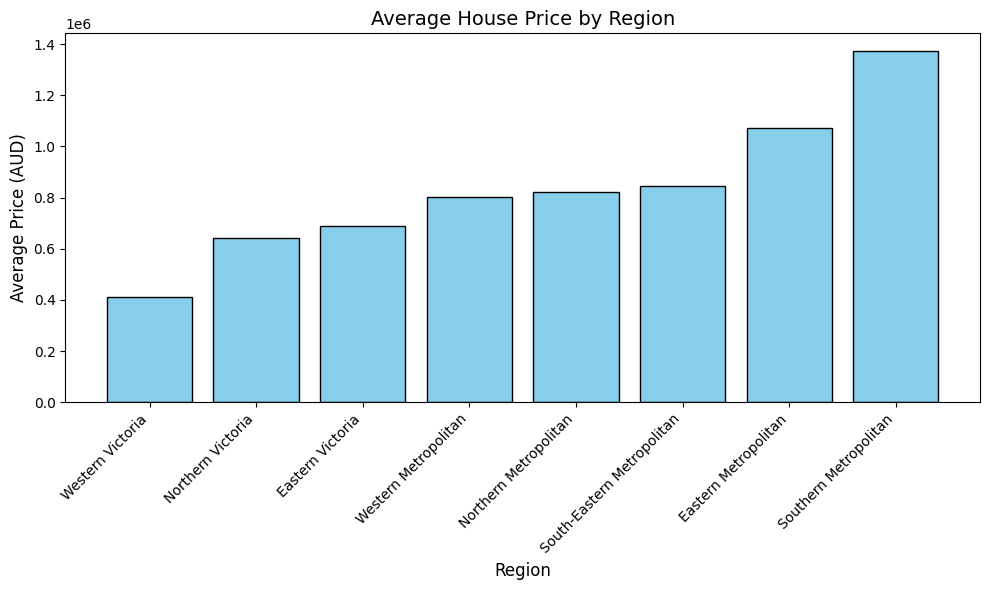

In [54]:
#Step 5: Visualize the Data. Create at least five (5) visualizations using: 
# Visualization 1: Matplotlib Bar Chart - Average Price by Regionname
print("""
Visualization 1: Bar Chart - Average Price by Region (Matplotlib)
Purpose: This bar chart displays the average house price for each region, allowing comparison of property values across different areas of Melbourne.
Expected Insight: Regions like Southern Metropolitan are expected to have higher average prices (around 1.37M AUD) due to proximity to the CBD, while regions like Western Victoria may show lower prices (around 412K AUD), indicating more affordable areas.
Details: The bars are sorted by price, with rotated x-labels for readability. The y-axis shows prices in Australian Dollars (AUD).
""")
plt.figure(figsize=(10, 6))
region_prices = df_price.groupby('Regionname')['Price'].mean().sort_values()
plt.bar(region_prices.index, region_prices.values, color='skyblue', edgecolor='black')
plt.title('Average House Price by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Price (AUD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('avg_price_by_region.png')
plt.show()


Visualization 2: Boxplot - Price by Number of Rooms (Matplotlib)
Purpose: This boxplot shows the distribution of house prices for properties with different numbers of rooms, highlighting price variability and outliers.
Expected Insight: Prices increase with room count (e.g., 1-room ~433K AUD, 5-room ~1.63M AUD), but outliers in lower-room categories (e.g., high-priced 2-room properties) may indicate luxury units or unique properties.
Details: Each box represents the interquartile range, with a red median line and whiskers for non-outlier ranges. The x-axis lists room counts, and the y-axis shows prices in AUD.



C:\Users\hp\AppData\Local\Temp\ipykernel_4844\2940991740.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(prices_by_rooms, labels=sorted(df_price['Rooms'].unique()), patch_artist=True,


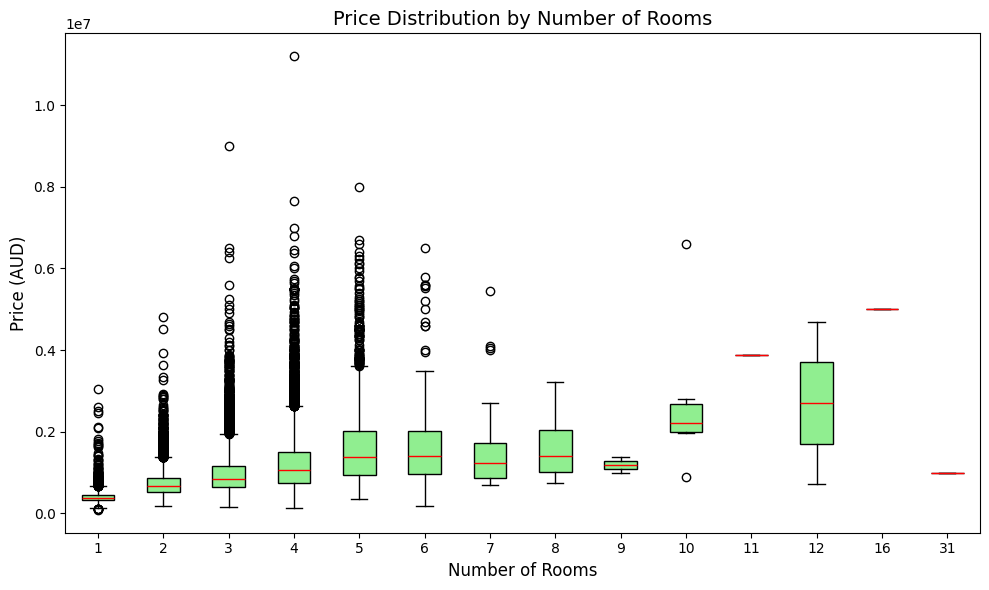

In [55]:
# Visualization 2: Matplotlib Boxplot - Price by Number of Rooms
print("""
Visualization 2: Boxplot - Price by Number of Rooms (Matplotlib)
Purpose: This boxplot shows the distribution of house prices for properties with different numbers of rooms, highlighting price variability and outliers.
Expected Insight: Prices increase with room count (e.g., 1-room ~433K AUD, 5-room ~1.63M AUD), but outliers in lower-room categories (e.g., high-priced 2-room properties) may indicate luxury units or unique properties.
Details: Each box represents the interquartile range, with a red median line and whiskers for non-outlier ranges. The x-axis lists room counts, and the y-axis shows prices in AUD.
""")
plt.figure(figsize=(10, 6))
prices_by_rooms = [df_price[df_price['Rooms'] == i]['Price'] for i in sorted(df_price['Rooms'].unique())]
plt.boxplot(prices_by_rooms, labels=sorted(df_price['Rooms'].unique()), patch_artist=True, 
boxprops=dict(facecolor='lightgreen', color='black'),
medianprops=dict(color='red'))
plt.title('Price Distribution by Number of Rooms', fontsize=14)
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Price (AUD)', fontsize=12)
plt.tight_layout()
plt.savefig('price_by_rooms.png')
plt.show()


Visualization 3: Histogram - Price Distribution (Seaborn)
Purpose: This histogram visualizes the distribution of house prices to assess its range, shape, and skewness, critical for understanding the target variable in regression.
Expected Insight: The distribution is right-skewed, with most prices between 620K–1.22M AUD (25th–75th percentiles) and a long tail up to 11.2M AUD, suggesting a need for log-transformation in modeling.
Details: A kernel density estimate (KDE) overlays the histogram for a smooth distribution curve. The x-axis shows prices in AUD, and the y-axis shows frequency.



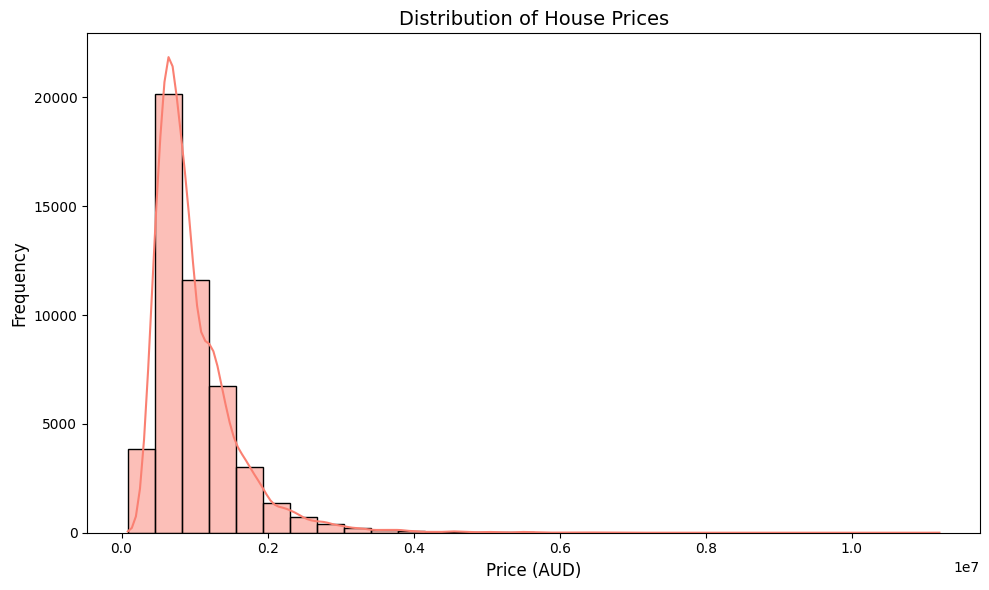

In [56]:
# Visualization 3: Seaborn Histogram - Price Distribution
print("""
Visualization 3: Histogram - Price Distribution (Seaborn)
Purpose: This histogram visualizes the distribution of house prices to assess its range, shape, and skewness, critical for understanding the target variable in regression.
Expected Insight: The distribution is right-skewed, with most prices between 620K–1.22M AUD (25th–75th percentiles) and a long tail up to 11.2M AUD, suggesting a need for log-transformation in modeling.
Details: A kernel density estimate (KDE) overlays the histogram for a smooth distribution curve. The x-axis shows prices in AUD, and the y-axis shows frequency.
""")
plt.figure(figsize=(10, 6))
sns.histplot(df_price['Price'], bins=30, kde=True, color='salmon', edgecolor='black')
plt.title('Distribution of House Prices', fontsize=14)
plt.xlabel('Price (AUD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.savefig('price_distribution.png')
plt.show()



Visualization 5: Scatterplot - Price vs Distance by Type and Rooms (Seaborn)
Purpose: This scatterplot explores the relationship between `Price` and `Distance` from the CBD, with `Type` as hue and `Rooms` as point size, providing insight into market segmentation by property type and size.
Expected Insight: Houses (`h`, ~1.11M AUD average) have higher prices and vary widely in distance, while units (`u`, ~630K AUD) are cheaper and closer to the CBD. Larger points (more rooms) cluster at higher prices, especially for houses.
Details: The x-axis shows distance in kilometers, the y-axis shows prices in AUD, and a legend identifies property types. Point sizes reflect room counts.



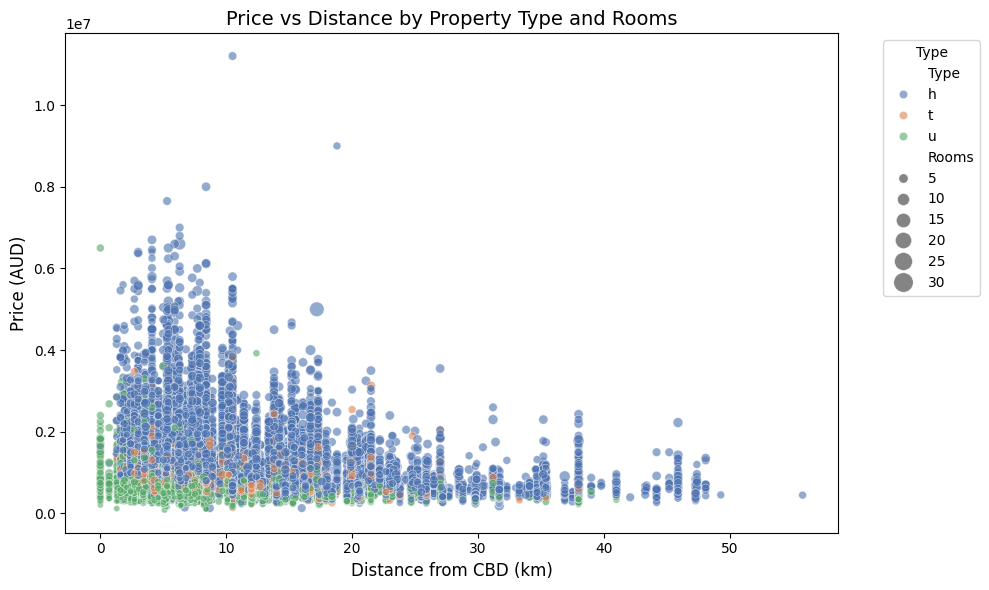

In [68]:
# Visualization 4: Seaborn Scatterplot - Price vs Distance by Type and Rooms
print("""
Visualization 5: Scatterplot - Price vs Distance by Type and Rooms (Seaborn)
Purpose: This scatterplot explores the relationship between `Price` and `Distance` from the CBD, with `Type` as hue and `Rooms` as point size, providing insight into market segmentation by property type and size.
Expected Insight: Houses (`h`, ~1.11M AUD average) have higher prices and vary widely in distance, while units (`u`, ~630K AUD) are cheaper and closer to the CBD. Larger points (more rooms) cluster at higher prices, especially for houses.
Details: The x-axis shows distance in kilometers, the y-axis shows prices in AUD, and a legend identifies property types. Point sizes reflect room counts.
""")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Price', hue='Type', size='Rooms', sizes=(20, 200), 
data=df_price, palette='deep', alpha=0.6)
plt.title('Price vs Distance by Property Type and Rooms', fontsize=14)
plt.xlabel('Distance from CBD (km)', fontsize=12)
plt.ylabel('Price (AUD)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Type')
plt.tight_layout()
plt.savefig('price_vs_distance.png')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_4844\1773471538.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_prices = df.groupby('Distance_bin')['Price'].mean() / 1_000_000  # Convert to million AUD


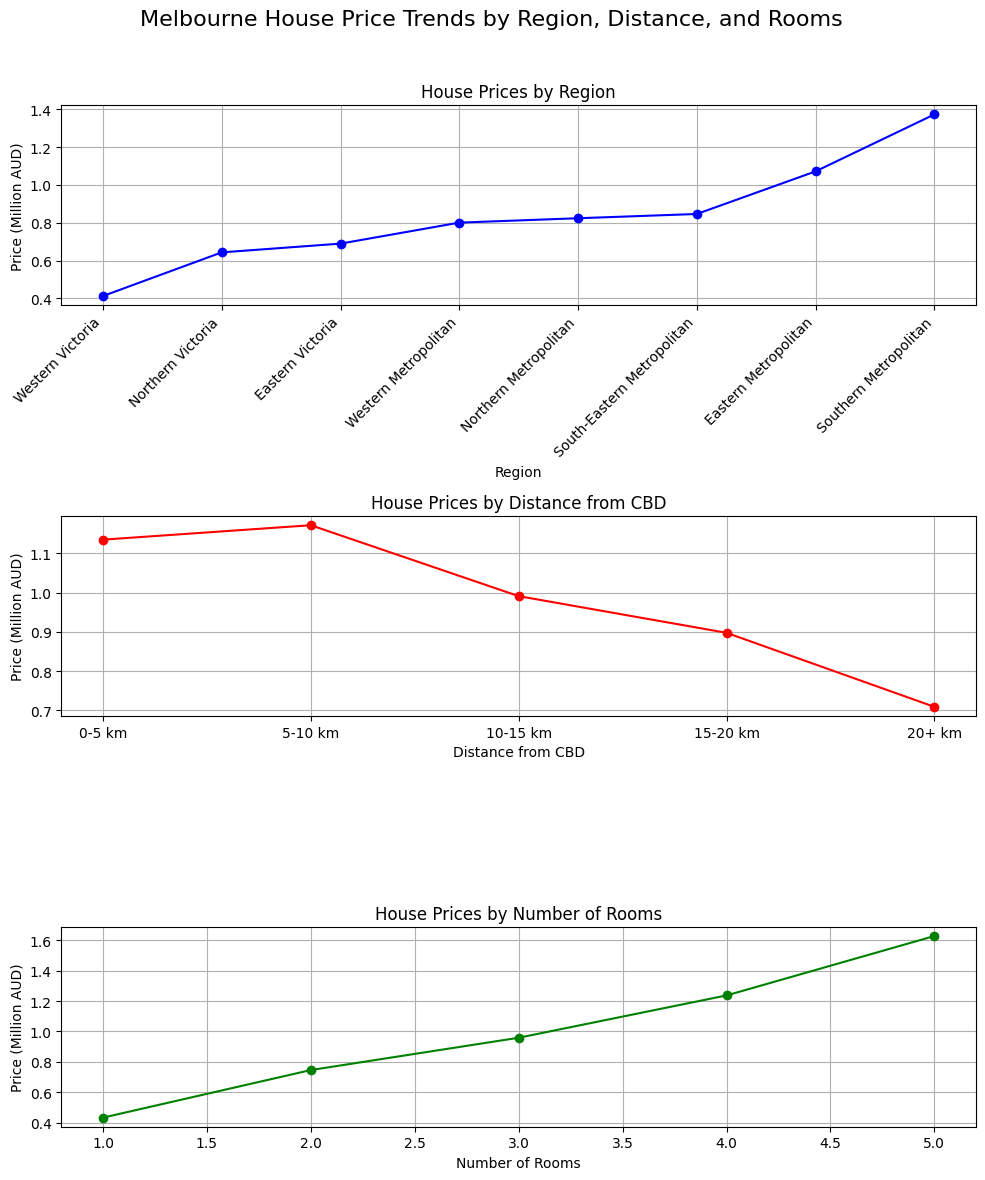


Visualization Overview: Three Line Plots - House Price Trends by Region, Distance, and Rooms
Purpose: This set of three line plots analyzes Melbourne house price trends across three key dimensions: Regionname, Distance from CBD, and Number of Rooms. Each subplot provides a clear view of how average house prices (in million AUD) vary with these features, offering insights into the factors influencing property values in Melbourne.

Subplot 1: House Prices by Region
- Description: This line plot shows the average house price for each region, sorted by price, with prices converted to million AUD for readability.
- Insight: Southern Metropolitan has the highest average price at approximately 1.37 million AUD, indicating it is the most expensive region, likely due to its proximity to the CBD and desirable amenities. Western Victoria has the lowest average price at around 0.41 million AUD, suggesting it is a more affordable region, possibly due to its distance from central Melbourne and lowe

In [80]:
#• 5th chart (your choice — must provide strong insight)--- line plot
# Use df from the notebook after dropping missing Price values
df = df.dropna(subset=['Price'])

# Data Preparation
# 1. Regionname: Mean price per region
region_prices = df.groupby('Regionname')['Price'].mean().sort_values() / 1_000_000  # Convert to million AUD
regions = region_prices.index
region_avg_prices = region_prices.values

# 2. Distance: Bin and calculate mean price
df['Distance_bin'] = pd.cut(df['Distance'], bins=[0, 5, 10, 15, 20, 50], 
                           labels=['0-5 km', '5-10 km', '10-15 km', '15-20 km', '20+ km'])
distance_prices = df.groupby('Distance_bin')['Price'].mean() / 1_000_000  # Convert to million AUD
distance_bins = distance_prices.index
distance_avg_prices = distance_prices.values

# 3. Rooms: Mean price for rooms 1 to 5
df_rooms = df[df['Rooms'] <= 5]
room_prices = df_rooms.groupby('Rooms')['Price'].mean() / 1_000_000  # Convert to million AUD
rooms = room_prices.index
room_avg_prices = room_prices.values

# Single figure with three subplots
plt.figure(figsize=(10, 12))

# Subplot 1: Regionname
plt.subplot(3, 1, 1)
plt.plot(regions, region_avg_prices, marker='o', color='blue', linestyle='-')
plt.title('House Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price (Million AUD)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Subplot 2: Distance
plt.subplot(3, 1, 2)
plt.plot(distance_bins, distance_avg_prices, marker='o', color='red', linestyle='-')
plt.title('House Prices by Distance from CBD')
plt.xlabel('Distance from CBD')
plt.ylabel('Price (Million AUD)')
plt.grid(True)

# Subplot 3: Rooms
plt.subplot(3, 1, 3)
plt.plot(rooms, room_avg_prices, marker='o', color='green', linestyle='-')
plt.title('House Prices by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price (Million AUD)')
plt.grid(True)

# Main title
plt.suptitle('Melbourne House Price Trends by Region, Distance, and Rooms', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for main title
plt.savefig('price_vs_region_distance_rooms_clear_line_plot.png')
plt.show()

print("""
Visualization Overview: Three Line Plots - House Price Trends by Region, Distance, and Rooms
Purpose: This set of three line plots analyzes Melbourne house price trends across three key dimensions: Regionname, Distance from CBD, and Number of Rooms. Each subplot provides a clear view of how average house prices (in million AUD) vary with these features, offering insights into the factors influencing property values in Melbourne.

Subplot 1: House Prices by Region
- Description: This line plot shows the average house price for each region, sorted by price, with prices converted to million AUD for readability.
- Insight: Southern Metropolitan has the highest average price at approximately 1.37 million AUD, indicating it is the most expensive region, likely due to its proximity to the CBD and desirable amenities. Western Victoria has the lowest average price at around 0.41 million AUD, suggesting it is a more affordable region, possibly due to its distance from central Melbourne and lower demand.

Subplot 2: House Prices by Distance from CBD
- Description: This line plot displays the average house price for different distance bins from the CBD (0-5 km, 5-10 km, 10-15 km, 15-20 km, 20+ km), with prices in million AUD.
- Insight: Houses closest to the CBD (0-5 km) have the highest average price at around 1.14 million AUD, while prices steadily decrease as distance increases, dropping to approximately 0.71 million AUD for houses 20+ km away. This confirms a strong negative correlation between distance from the CBD and house prices, as properties closer to the city center are more desirable and thus more expensive.

Subplot 3: House Prices by Number of Rooms
- Description: This line plot illustrates the average house price for properties with 1 to 5 rooms, with prices in million AUD.
- Insight: There is a clear upward trend in house prices as the number of rooms increases, from around 0.43 million AUD for 1-room properties to approximately 1.63 million AUD for 5-room properties. This indicates that larger properties with more rooms command significantly higher prices, reflecting the preference for spacious homes in the Melbourne housing market.

Overall Insight: These visualizations highlight the key drivers of house prices in Melbourne. Proximity to the CBD (Distance) and the region (Regionname) are major factors, with closer and more central regions like Southern Metropolitan being the most expensive. Additionally, the number of rooms strongly influences price, with larger homes fetching much higher values. These insights can guide buyers in identifying affordable regions (e.g., Western Victoria, farther distances) and understanding the premium for larger properties.
""")


In [77]:
#Step 6: Apply Machine Learning Analysis.
# Assuming df_encoded is the preprocessed dataset from the provided notebook
# Drop non-numeric or irrelevant columns (e.g., Address)
X = df_encoded.drop(['Price', 'Address'], axis=1)
y = df_encoded['Price']

# Step 1: Split the data into training and testing sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 3: Train the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Step 4: Make predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Step 5: Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'Model': model_name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Collect evaluation metrics
lr_metrics = evaluate_model(y_test, lr_pred, 'Linear Regression')
rf_metrics = evaluate_model(y_test, rf_pred, 'Random Forest Regressor')

# Create a performance summary table
performance_df = pd.DataFrame([lr_metrics, rf_metrics])

# Print performance summary
print("\nModel Performance Summary:")
print(performance_df.to_string(index=False))

# Save the plot
plt.savefig('actual_vs_predicted_prices.png')
plt.close()

# Step 7: Feature Importance for Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance.to_string(index=False))


Model Performance Summary:
                  Model      MAE      MSE     RMSE       R2
      Linear Regression 0.454802 0.461024 0.678988 0.536496
Random Forest Regressor 0.315905 0.294633 0.542801 0.703782

Random Forest Feature Importance:
                              Feature  Importance
                             Distance    0.184905
                               Type_u    0.169897
                                Rooms    0.144297
     Regionname_Southern Metropolitan    0.137374
                                  Day    0.056376
                             Postcode    0.050194
                      SellerG_encoded    0.049652
                                Month    0.042451
                        Propertycount    0.040942
                       Suburb_encoded    0.025147
                  CouncilArea_encoded    0.024211
                                 Year    0.018901
                               Type_t    0.018099
                             Method_S    0.012115
       

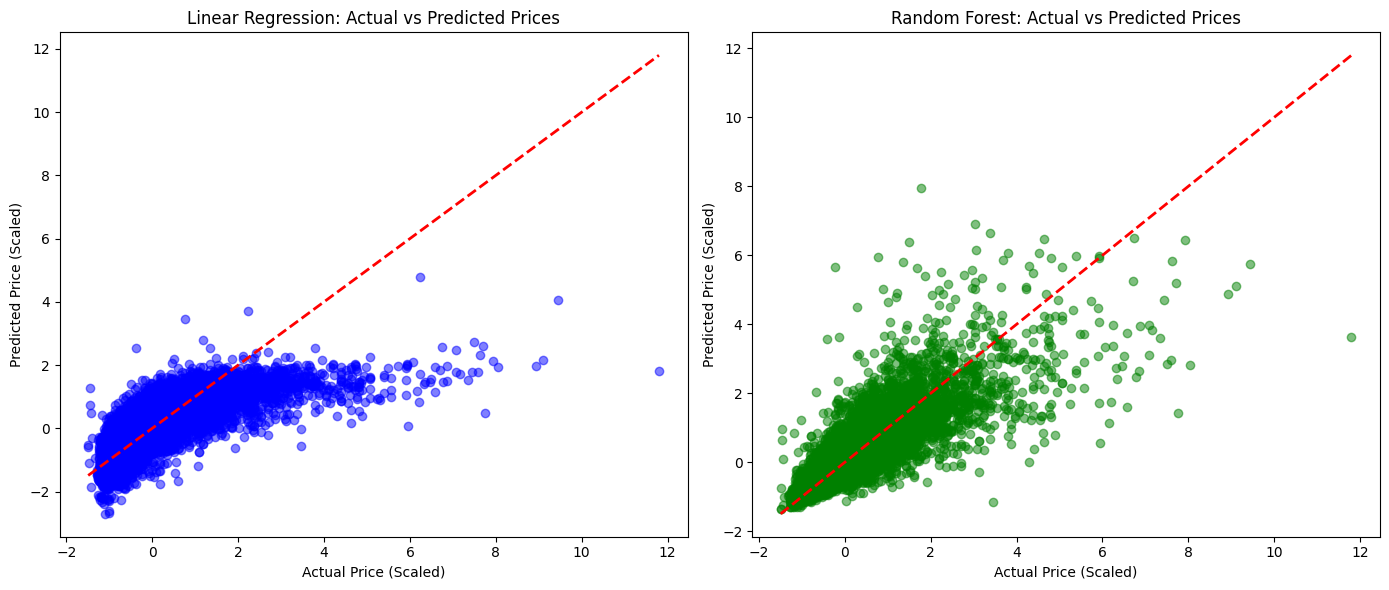

In [78]:
# Step 6: Visualize Actual vs Predicted Prices for both models
plt.figure(figsize=(14, 6))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Price (Scaled)')
plt.ylabel('Predicted Price (Scaled)')
plt.tight_layout()

# Random Forest Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest: Actual vs Predicted Prices')
plt.xlabel('Actual Price (Scaled)')
plt.ylabel('Predicted Price (Scaled)')
plt.tight_layout()